In [1]:
"""
The world_values data set is available online at http://54.227.246.164/dataset/. In the data,
    residents of almost all countries were asked to rank their top 6 'priorities'. Specifically,
    they were asked "Which of these are most important for you and your family?"

This code and world-values.tex guides the student through the process of training several models
    that predict the HDI (Human Development Index) rating of a country from the responses of its
    citizens to the world values data.
"""

from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors

from world_values_utils import import_world_values_data
from world_values_utils import plot_pca

from world_values_pipelines import k_nearest_neighbors_regression_pipeline
from world_values_parameters import regression_knn_parameters

Predicting HDI from World Values Survey

Importing Training Data
Ireland
Training Data Count: 148


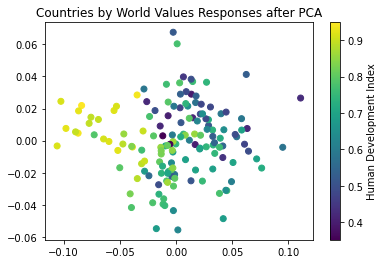

Nearest Neighbors of the US:
1.) Ireland
2.) United Kingdom
3.) Belgium
4.) Finland
5.) Malta
6.) Austria
7.) France


/Users/nataliekemper/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


RMSE: 0.32723432312237305
Best Value of k: 16
Pipeline(steps=[('knn',
                 KNeighborsRegressor(n_neighbors=16, weights='distance'))]) 



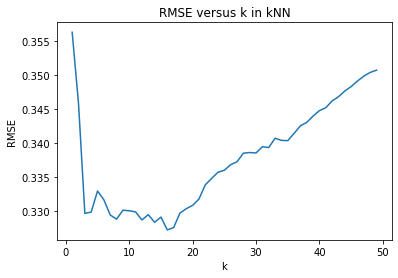

In [3]:
def main():
    print("Predicting HDI from World Values Survey\n")

    # Import Data #
    print("Importing Training Data")
    values_train, hdi_train, countries = import_world_values_data()
    print(countries[90])

    # Center the HDI Values #
    hdi_scaler = StandardScaler(with_std=False)
    hdi_shifted_train = hdi_scaler.fit_transform(hdi_train)

    # Data Information #
    print('Training Data Count:', values_train.shape[0])

    # Part A: PCA (modify plot_pca method in world_values_utils) #
    plot_pca(values_train, hdi_train)

    # Part C: Find the 7 nearest neighbors of the U.S.
    nbrs = NearestNeighbors(n_neighbors=8).fit(values_train)
    us_features = values_train.iloc[45].to_numpy().reshape(1, -1)
    us_features

    # Use nbrs to get the k nearest neighbors of us_features & retrieve the corresponding countries
    ##### TODO(c): Your Code Here #####
    distance, indices = nbrs.kneighbors(us_features)
    print("Nearest Neighbors of the US:")
    for i in np.arange(1, 8):
        print(str(i) + ".)", countries[indices[0][i]])

    # Part D: complete _rmse_grid_search to find the best value of k for Regression Grid Search #
    # Parts F and H: rerun this after modifications to find the best value of k for Regression Grid Search #
    _rmse_grid_search(values_train, hdi_shifted_train,
                      k_nearest_neighbors_regression_pipeline,
                      regression_knn_parameters, 'knn')

if __name__ == '__main__':
    main()


In [2]:
def _rmse_grid_search(training_features, training_labels, pipeline, parameters, technique):
    """
    Input:
        training_features: world_values responses on the training set
        training_labels: HDI (human development index) on the training set
        pipeline: regression model specific pipeline
        parameters: regression model specific parameters
        technique: regression model's name

    Output:
        Prints best RMSE and best estimator
        Prints feature weights for Ridge and Lasso Regression
        Plots RMSE vs k for k Nearest Neighbors Regression
    """
    # Use GridSearchCV to create and fit a grid of search results
    ##### TODO(d): Your Code Here #####
    
    grid = GridSearchCV(estimator=pipeline, param_grid=parameters, scoring='neg_root_mean_squared_error')
    grid.fit(training_features, training_labels)

    print("RMSE:", sqrt(-grid.best_score_))
    # prints the best k-value
    print("Best Value of k:", grid.cv_results_['param_knn__n_neighbors'][grid.best_index_])
    print(grid.best_estimator_, "\n")

    # Plot RMSE vs k for k Nearest Neighbors Regression
    plt.plot(grid.cv_results_['param_knn__n_neighbors'],
             (-grid.cv_results_['mean_test_score'])**0.5)
    plt.xlabel('k')
    plt.ylabel('RMSE')
    plt.title('RMSE versus k in kNN')
    plt.show()